In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('kc_house_data.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_13728\4187798624.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm')


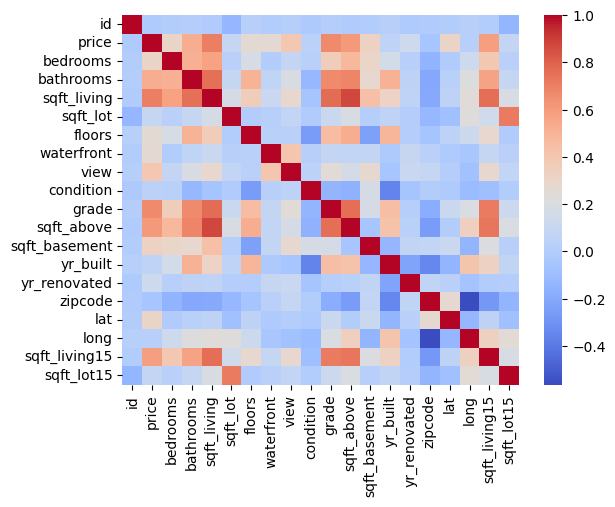

In [6]:
# visualising data part using heatmap find correlation b/w parameters
# for thiis matplotlib and sashore libraries are used coolwarm has  less contrast between the middle values and the extremes. 
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()




<AxesSubplot: title={'center': 'House price vs Squared Feet'}, xlabel='Squared feet', ylabel='House price(in millions)'>

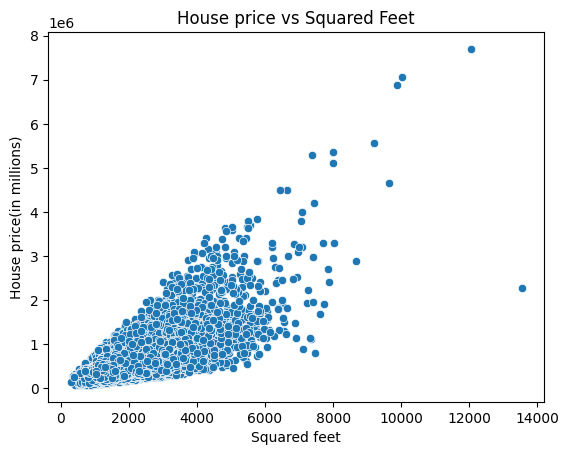

In [14]:
plt.title("House price vs Squared Feet")
plt.xlabel("Squared feet")
plt.ylabel("House price(in millions)")
sns.scatterplot(x='sqft_living',y='price', data=df)


In [16]:
# strong correlation b/w sqft_living and price.
# if we use multiple features for outcome prediction then its called multivariate regression model
#df two dimensional dataframe which is labeled has columns of different types 
area = df['sqft_living']
price = df['price']
# np arr() is a numpy array we can specify the type of data in list like label
# -1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis.It will get reshaped in 1 column.
x = np.array(area).reshape(-1,1)
y = np.array(price) 

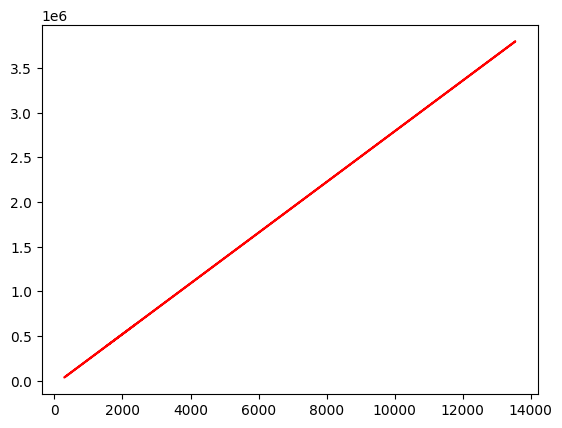

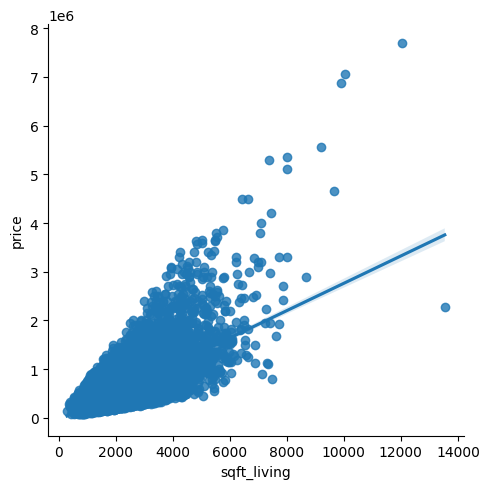

In [20]:
# 70-80 as training and 30-20 as testing
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
# fit model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
plt.plot(X_train,model.coef_*X_train +model.intercept_, 'r',label="Intercept: -39,163 \n Slope: 279.4")
sns.lmplot(x='sqft_living',y='price', data=df)

In [13]:
# calculation of intercept and coefficient
print(model.intercept_)
print(model.coef_)

pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,predictions)))

[-48257.06359103]
[[283.96855716]]
MSE :  61940787124.62474
RMSE :  248879.06124185043


In [14]:
m = 0
c = 0
L = 0.001
epochs = 100
n = float(len(x))

In [15]:
for i in range(epochs):
   Y_pred=m*x+c
   Dm = (-2/n)*sum(x*(y-Y_pred))
   Dc = (-2/n)*sum(y-Y_pred)
   m = m-L*Dm
   c = c-L*Dc
   print(m,c)
   # value prediction
   y_pred = df['sqft_living'].apply(lambda a:c+m*a)
   y_pred.head()

   


[ 923059.50295655 2237972.11622635  748763.90505714 ... 1672659.52770768
 1663919.78901587 1351934.82857539] [ 443.8   1076.     360.    ...  804.202  800.     650.   ]
[-9.54162651e+09 -2.31338218e+10 -7.73994039e+09 ... -1.72902098e+10
 -1.71998675e+10 -1.39748924e+10] [-3838855.72112139 -9307365.38063689 -3113988.41731345 ...
 -6956321.42550083 -6919974.2606965  -5622479.08681593]
[9.86409236e+13 2.39156453e+14 8.00151701e+13 ... 1.78745444e+14
 1.77811489e+14 1.44471835e+14] [3.96874222e+10 9.62227722e+10 3.21934925e+10 ... 7.19168641e+10
 7.15410945e+10 5.81271393e+10]
[-1.01974561e+18 -2.47238908e+18 -8.27193373e+17 ... -1.84786268e+18
 -1.83820749e+18 -1.49354359e+18] [-4.10286854e+14 -9.94746857e+14 -3.32814933e+14 ... -7.43473431e+14
 -7.39588741e+14 -6.00915852e+14]
[1.05420860e+22 2.55594515e+22 8.55148935e+21 ... 1.91031246e+22
 1.90033097e+22 1.54401891e+22] [4.24152777e+18 1.02836500e+19 3.44062641e+18 ... 7.68599621e+18
 7.64583646e+18 6.21224212e+18]
[-1.08983630e+26 -2